
# Investment Analaysis and Portfolio Optimization

This report aims to analyse the performance of an equal-weighted investment in five top S&P 500 companies (Apple, NVIDIA, Microsoft, Amazon, Meta) from 2015 to 2024 and compare it to the performance of the S&P 500 index. 
Additionally, we will compute the Sharpe ratio to assess risk-adjusted returns and optimize the portfolio based on the analysis.

Case Description
Details
The selected companies for this analysis are:
1 Apple (AAPL)
2 NVIDIA (NVDA)
3 Microsoft (MSFT)
4 Amazon (AMZN)
5 Meta (META)
These companies are significant players in the S&P 500 index and have shown substantial growth over the years.
Participants
The primary participants in this case study are ordinary investors who seek to maximize their returns while managing risk.


Investment Strategy
An initial investment of $100,000 will be equally split among the five selected companies from January 1, 2015, to December 31, 2024. The performance of these investments will be compared to the S&P 500 index over the same period.


In [88]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sbn
%matplotlib inline 

In [89]:
import pandas as pd

# Load the CSV file
StockList = pd.read_csv("C:\\Users\\WY343EH\\OneDrive - EY\\Desktop\\Investment Analysis Project\\AllPricesCleaned.csv")

# Convert the 'Date' column to datetime
StockList['Date'] = pd.to_datetime(StockList['Date'],format='%d/%m/%Y')

# Set the 'Date' column as the index
StockList = StockList.set_index('Date')

# Strip any whitespace from the column names
StockList.columns = StockList.columns.str.strip()

# Check if 'SP500' column exists in the DataFrame
if 'SP500' in StockList.columns:
    # Convert the 'SP500' column from object to float
    StockList['SP500'] = StockList['SP500'].astype(float)
else:
    print("Error: 'SP500' column not found in the DataFrame.")

# Display the first few rows of the DataFrame
print(StockList.head())


             AMZN   AAPL   META   MSFT  NVDA   SP500
Date                                                
2015-01-02  15.43  27.33  78.45  46.76  0.50  2058.2
2015-01-05  15.11  26.56  77.19  46.33  0.49  2020.6
2015-01-06  14.76  26.57  76.15  45.65  0.48  2002.6
2015-01-07  14.92  26.94  76.15  46.23  0.48  2025.9
2015-01-08  15.02  27.97  78.17  47.59  0.50  2062.1


In [90]:
StockList.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-01-02 to 2024-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    2516 non-null   float64
 1   AAPL    2516 non-null   float64
 2   META    2516 non-null   float64
 3   MSFT    2516 non-null   float64
 4   NVDA    2516 non-null   float64
 5   SP500   2516 non-null   float64
dtypes: float64(6)
memory usage: 137.6 KB


In [91]:
import pandas as pd

# Initialize an empty dictionary to store the stock data
stocks = {}

# List of stock names
StockName = ['AMZN', 'AAPL', 'META', 'MSFT', 'NVDA', 'SP500']

# Loop through each stock name
for i_stock in StockName:
    # Load the CSV file
    stock_data = pd.read_csv("C:\\Users\\WY343EH\\OneDrive - EY\\Desktop\\Investment Analysis Project\\AllPricesCleaned.csv")
    
    # Strip any whitespace from the column names
    stock_data.columns = stock_data.columns.str.strip()
    
    # Convert the 'Date' column to datetime with format '%d/%m/%Y'
    stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%d/%m/%Y')
    
    # Check if 'SP500' column exists in the DataFrame
    if 'SP500' in stock_data.columns:
        # Select the required columns
        stocks[i_stock] = stock_data[['Date', 'AMZN', 'AAPL', 'META', 'MSFT', 'NVDA', 'SP500']]
    else:
        print("Error: 'SP500' column not found in the DataFrame.")

# Set the Date column as the index for each DataFrame in the dictionary
for stock, data in stocks.items():
    data.set_index('Date', inplace=True)

# Display the first few rows of the DataFrame
for stock, data in stocks.items():
    print(f"Data for {stock}:")
    print(data.head())


Data for AMZN:
             AMZN   AAPL   META   MSFT  NVDA   SP500
Date                                                
2015-01-02  15.43  27.33  78.45  46.76  0.50  2058.2
2015-01-05  15.11  26.56  77.19  46.33  0.49  2020.6
2015-01-06  14.76  26.57  76.15  45.65  0.48  2002.6
2015-01-07  14.92  26.94  76.15  46.23  0.48  2025.9
2015-01-08  15.02  27.97  78.17  47.59  0.50  2062.1
Data for AAPL:
             AMZN   AAPL   META   MSFT  NVDA   SP500
Date                                                
2015-01-02  15.43  27.33  78.45  46.76  0.50  2058.2
2015-01-05  15.11  26.56  77.19  46.33  0.49  2020.6
2015-01-06  14.76  26.57  76.15  45.65  0.48  2002.6
2015-01-07  14.92  26.94  76.15  46.23  0.48  2025.9
2015-01-08  15.02  27.97  78.17  47.59  0.50  2062.1
Data for META:
             AMZN   AAPL   META   MSFT  NVDA   SP500
Date                                                
2015-01-02  15.43  27.33  78.45  46.76  0.50  2058.2
2015-01-05  15.11  26.56  77.19  46.33  0.49  2020.6
2

In [92]:
StockList.describe()

,AMZN,AAPL,META,MSFT,NVDA,SP500
count,2516.00000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,101.23310,96.363994,222.248148,187.702039,20.820000,3356.126884
std,54.17386,65.255167,121.688141,122.886738,32.314598,1083.901366
min,14.35000,22.590000,74.050000,40.290000,0.480000,1829.100000
25%,48.39750,37.640000,136.402500,71.080000,3.580000,2432.325000
50%,94.57000,66.660000,183.090000,153.435000,6.535000,3005.000000
75%,153.85750,152.772500,280.872500,283.497500,21.260000,4204.595000
max,232.93000,259.020000,632.680000,467.560000,148.880000,6090.270000


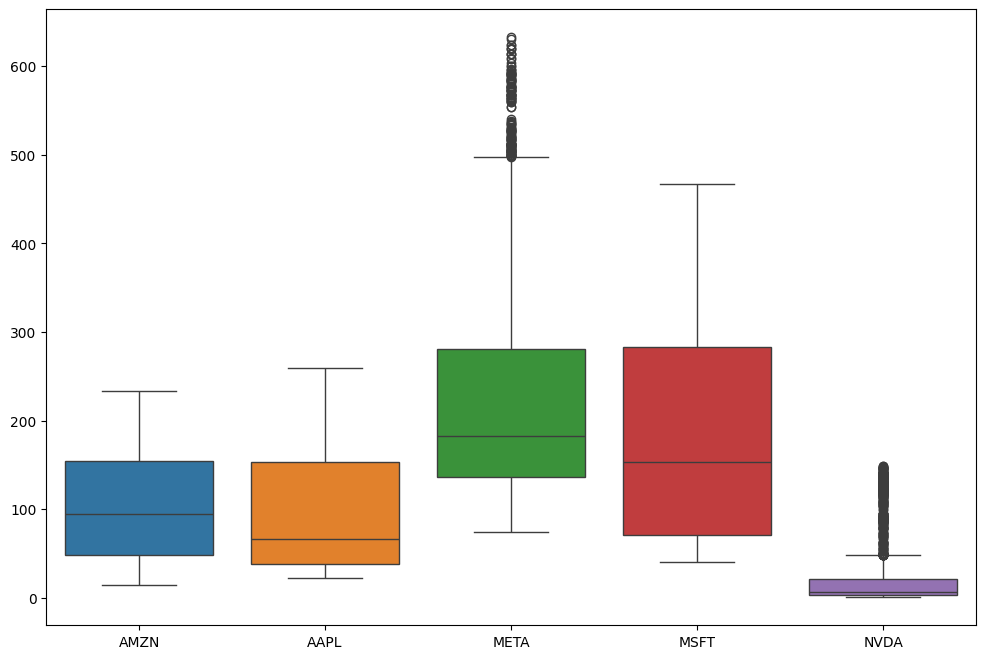

In [93]:
   # View the total portfolio
plt.figure(figsize = (12,8))
sbn.boxplot(data = StockList[['AMZN', 'AAPL', 'META', 'MSFT', 'NVDA']]);
plt.savefig('C:\\Users\\WY343EH\\OneDrive - EY\\Desktop\\Investment Analysis Project\\Outputs\\figure 1')

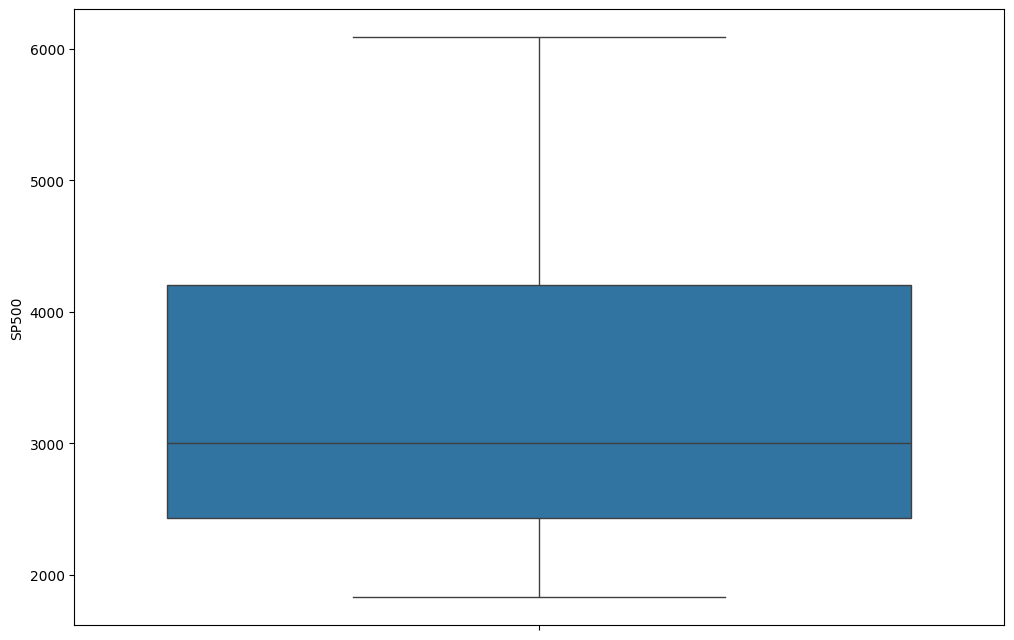

In [94]:
    # View the total portfolio
plt.figure(figsize = (12,8))
sbn.boxplot(data = StockList['SP500']);
plt.savefig('C:\\Users\\WY343EH\\OneDrive - EY\\Desktop\\Investment Analysis Project\\Outputs\\figure 2')

In [95]:
StockList.head()

,AMZN,AAPL,META,MSFT,NVDA,SP500
Date,,,,,,
2015-01-02,15.43,27.33,78.45,46.76,0.50,2058.2
2015-01-05,15.11,26.56,77.19,46.33,0.49,2020.6
2015-01-06,14.76,26.57,76.15,45.65,0.48,2002.6
2015-01-07,14.92,26.94,76.15,46.23,0.48,2025.9
2015-01-08,15.02,27.97,78.17,47.59,0.50,2062.1


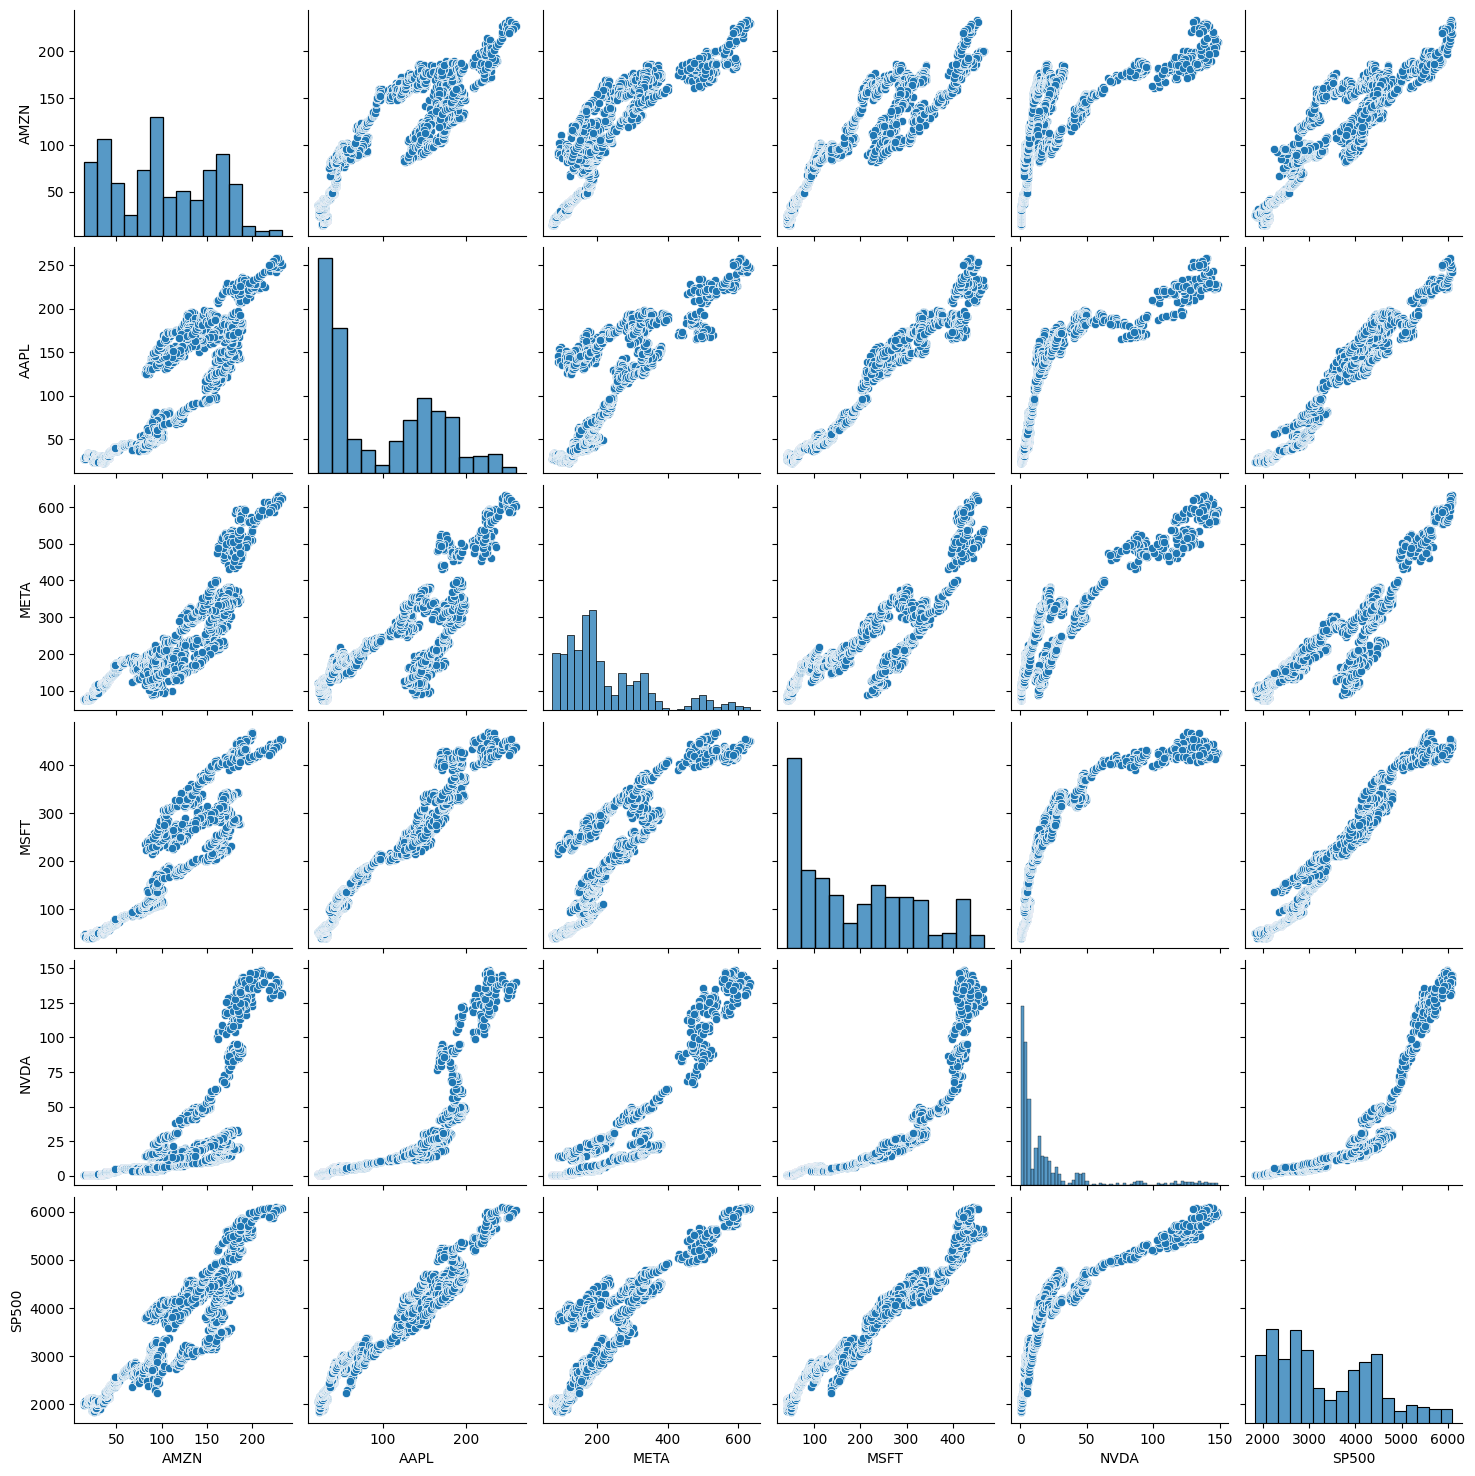

In [96]:
sbn.pairplot(StockList);
plt.savefig('C:\\Users\\WY343EH\\OneDrive - EY\\Desktop\\Investment Analysis Project\\Outputs\\figure 3')

In [97]:
StockList.corr()

,AMZN,AAPL,META,MSFT,NVDA,SP500
AMZN,1.000000,0.878575,0.869682,0.909994,0.690329,0.919258
AAPL,0.878575,1.000000,0.819523,0.980802,0.796134,0.974464
META,0.869682,0.819523,1.000000,0.874288,0.898407,0.891680
MSFT,0.909994,0.980802,0.874288,1.000000,0.822949,0.985296
NVDA,0.690329,0.796134,0.898407,0.822949,1.000000,0.833733
SP500,0.919258,0.974464,0.891680,0.985296,0.833733,1.000000


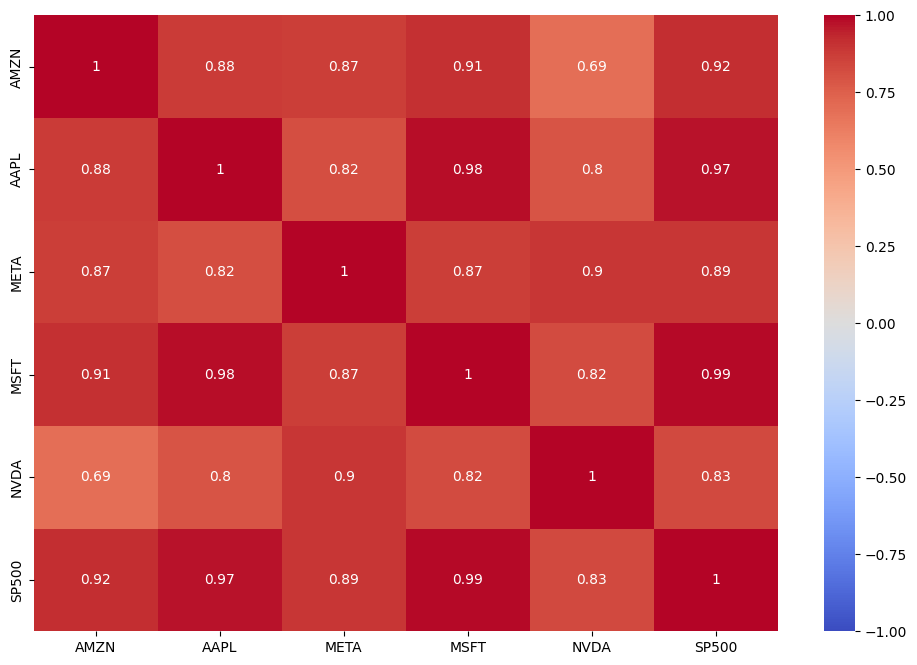

In [98]:
# View the total portfolio
plt.figure(figsize = (12,8))
sbn.heatmap(StockList.corr(),cmap='coolwarm', vmin = -1, annot = True);
plt.savefig('C:\\Users\\WY343EH\\OneDrive - EY\\Desktop\\Investment Analysis Project\\Outputs\\figure 4')

In [99]:
if 'META' in stocks:
    stocks['META'] = stocks['META'].drop(columns=['AMZN', 'AAPL', 'MSFT', 'NVDA', 'SP500'])

In [100]:
if 'AMZN' in stocks:
    stocks['AMZN'] = stocks['AMZN'].drop(columns=['META', 'AAPL', 'MSFT', 'NVDA', 'SP500'])

In [101]:
if 'AAPL' in stocks:
    stocks['AAPL'] = stocks['AAPL'].drop(columns=['AMZN', 'META', 'MSFT', 'NVDA', 'SP500'])

In [102]:
if 'MSFT' in stocks:
    stocks['MSFT'] = stocks['MSFT'].drop(columns=['AMZN', 'AAPL', 'META', 'NVDA', 'SP500'])

In [103]:
if 'NVDA' in stocks:
    stocks['NVDA'] = stocks['NVDA'].drop(columns=['AMZN', 'AAPL', 'MSFT', 'META', 'SP500'])

In [104]:
if 'SP500' in stocks:
    stocks['SP500'] = stocks['SP500'].drop(columns=['AMZN', 'AAPL', 'MSFT', 'NVDA', 'META'])

In [105]:
# Rename the stock price columns to 'Adj Close'

stocks['AAPL'].columns = ['Adj Close']
stocks['AMZN'].columns = ['Adj Close']
stocks['NVDA'].columns = ['Adj Close']
stocks['MSFT'].columns = ['Adj Close']
stocks['META'].columns = ['Adj Close']
stocks['SP500'].columns = ['Adj Close']
stocks['SP500'].head()

,Adj Close
Date,
2015-01-02,2058.2
2015-01-05,2020.6
2015-01-06,2002.6
2015-01-07,2025.9
2015-01-08,2062.1


for stock, data in stocks.items():
    data.sort_index(ascending=True, inplace=True)


In [106]:
# Display the first few rows of the DataFrame
for stock, data in stocks.items():
    print(f"Data for {stock}:")
    print(data.head())
    

Data for AMZN:
            Adj Close
Date                 
2015-01-02      15.43
2015-01-05      15.11
2015-01-06      14.76
2015-01-07      14.92
2015-01-08      15.02
Data for AAPL:
            Adj Close
Date                 
2015-01-02      27.33
2015-01-05      26.56
2015-01-06      26.57
2015-01-07      26.94
2015-01-08      27.97
Data for META:
            Adj Close
Date                 
2015-01-02      78.45
2015-01-05      77.19
2015-01-06      76.15
2015-01-07      76.15
2015-01-08      78.17
Data for MSFT:
            Adj Close
Date                 
2015-01-02      46.76
2015-01-05      46.33
2015-01-06      45.65
2015-01-07      46.23
2015-01-08      47.59
Data for NVDA:
            Adj Close
Date                 
2015-01-02       0.50
2015-01-05       0.49
2015-01-06       0.48
2015-01-07       0.48
2015-01-08       0.50
Data for SP500:
            Adj Close
Date                 
2015-01-02     2058.2
2015-01-05     2020.6
2015-01-06     2002.6
2015-01-07     2025.9
2015-01

In [107]:
# Create 'Normalized Return' column for each stock

for stock_name, stock_data in stocks.items():
    first_adj_close = stock_data.iloc[0]['Adj Close']
    stock_data ['Normalised Returns'] = stock_data['Adj Close']/first_adj_close



SP500 = stocks['SP500']




In [108]:

SP500['Position Value'] = SP500['Normalised Returns'] *100000

SP500.head()

,Adj Close,Normalised Returns,Position Value
Date,,,
2015-01-02,2058.2,1.000000,100000.000000
2015-01-05,2020.6,0.981732,98173.161014
2015-01-06,2002.6,0.972986,97298.610436
2015-01-07,2025.9,0.984307,98430.667574
2015-01-08,2062.1,1.001895,100189.485959


In [109]:
stocks['SP500'].head()


,Adj Close,Normalised Returns,Position Value
Date,,,
2015-01-02,2058.2,1.000000,100000.000000
2015-01-05,2020.6,0.981732,98173.161014
2015-01-06,2002.6,0.972986,97298.610436
2015-01-07,2025.9,0.984307,98430.667574
2015-01-08,2062.1,1.001895,100189.485959


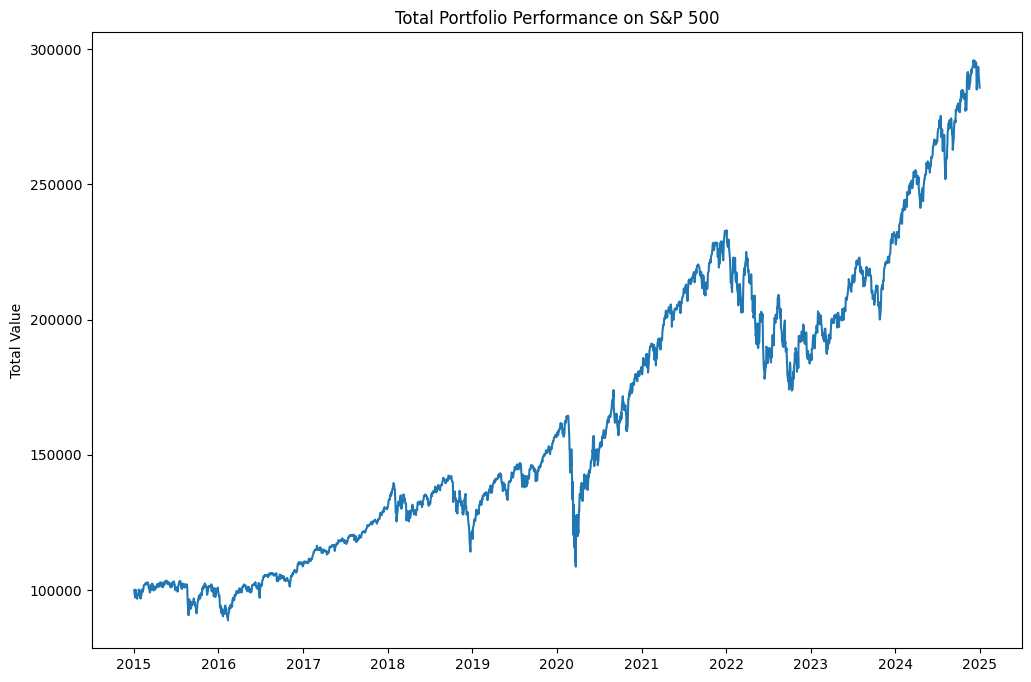

In [110]:
# View the total portfolio
plt.figure(figsize = (12,8))

plt.plot(SP500['Position Value'])
plt.title('Total Portfolio Performance on S&P 500')
plt.ylabel('Total Value');
plt.savefig('C:\\Users\\WY343EH\\OneDrive - EY\\Desktop\\Investment Analysis Project\\Outputs\\figure 5')

In [111]:

portfolio = {key: stocks[key] for key in ['AMZN', 'AAPL', 'MSFT', 'NVDA', 'META']}
# Create allocation for each stock - equally weighted in our initial portfolio
for stock_name, stock_data in portfolio.items():
    stock_data ['Allocation'] = stock_data['Normalised Returns']* 0.2 # Equally weighted

for stock_name, stock_data in portfolio.items():
    stock_data ['Position Value'] = stock_data['Allocation']* 100000


In [112]:
portfolio_values = {}

for stock_name, stock_data in portfolio.items():
    portfolio_values[stock_name] = stock_data['Position Value']

portfolio_values = pd.DataFrame(data = portfolio_values)
portfolio_values['Total'] = portfolio_values.sum(axis =1 )
portfolio_values.head()

,AMZN,AAPL,MSFT,NVDA,META,Total
Date,,,,,,
2015-01-02,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,100000.000000
2015-01-05,19585.223590,19436.516648,19816.082121,19600.0,19678.776291,98116.598651
2015-01-06,19131.561892,19443.834614,19525.235244,19200.0,19413.639261,96714.271011
2015-01-07,19338.950097,19714.599341,19773.310522,19200.0,19413.639261,97440.499221
2015-01-08,19468.567725,20468.349799,20355.004277,20000.0,19928.616953,100220.538755


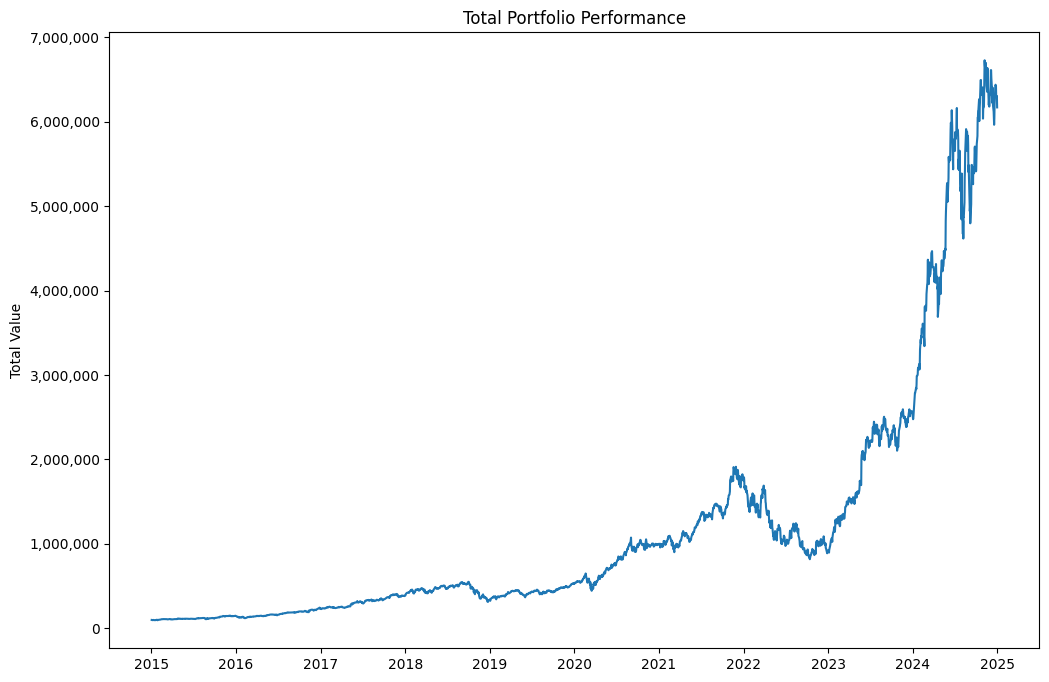

In [113]:
# View the total portfolio
plt.figure(figsize = (12,8))

plt.plot(portfolio_values['Total'])
plt.title('Total Portfolio Performance')
plt.ylabel('Total Value');
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'));
plt.savefig('C:\\Users\\WY343EH\\OneDrive - EY\\Desktop\\Investment Analysis Project\\Outputs\\figure 6')

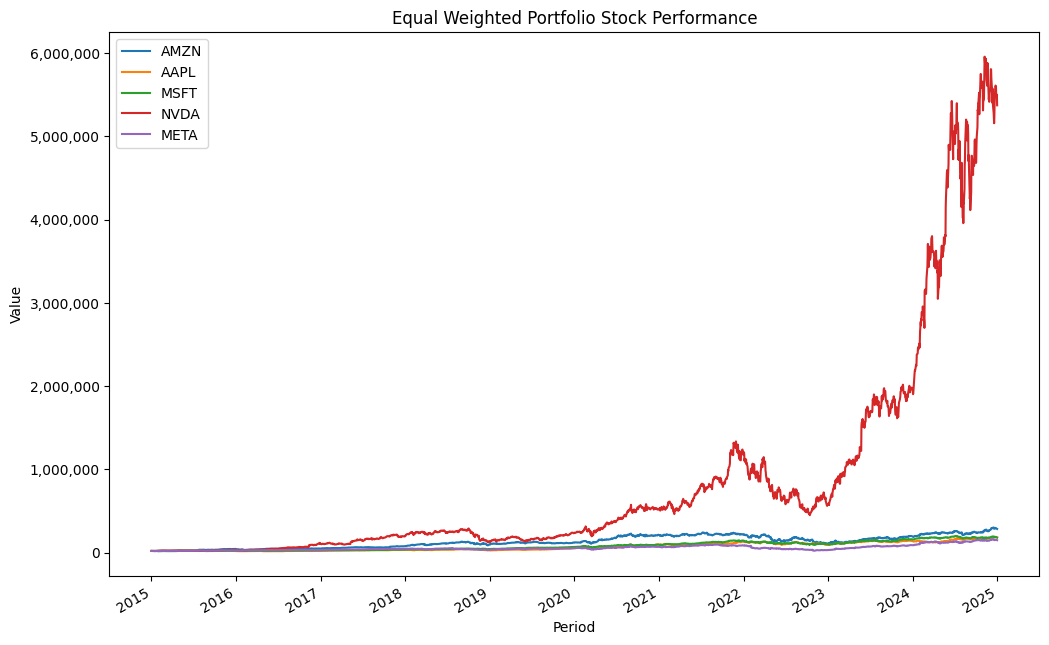

In [114]:
# View the four stocks in the portfolio
plt.figure(figsize = (12,8))

#plt.plot(portfolio_values.iloc[:,0:5])
portfolio_values[['AMZN', 'AAPL', 'MSFT', 'NVDA', 'META']].plot(ax=plt.gca())

plt.title('Equal Weighted Portfolio Stock Performance')
plt.xlabel('Period')
plt.ylabel('Value')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'));
plt.savefig('C:\\Users\\WY343EH\\OneDrive - EY\\Desktop\\Investment Analysis Project\\Outputs\\figure 7')

In [115]:
portfolio_values.tail()

,AMZN,AAPL,MSFT,NVDA,META,Total
Date,,,,,,
2024-12-24,296889.176928,188949.871936,187908.468777,5608800.0,154939.451880,6.437487e+06
2024-12-26,294296.824368,189549.945115,187386.655261,5597200.0,153817.718292,6.422251e+06
2024-12-27,290019.442644,187039.882913,184144.568007,5480400.0,152915.232632,6.294519e+06
2024-12-30,286843.810758,184559.092572,181706.586826,5499600.0,150730.401530,6.303440e+06
2024-12-31,284368.114064,183256.494694,180282.292558,5371600.0,149269.598470,6.168776e+06


In [116]:
Return = SP500.join(portfolio_values['Total'], how='inner')
Return = Return[['Position Value','Total']]
Return = Return.rename(columns={'Position Value':'S&P 500 Return','Total': 'Portfolio Return'})
Return.head()

,S&P 500 Return,Portfolio Return
Date,,
2015-01-02,100000.000000,100000.000000
2015-01-05,98173.161014,98116.598651
2015-01-06,97298.610436,96714.271011
2015-01-07,98430.667574,97440.499221
2015-01-08,100189.485959,100220.538755


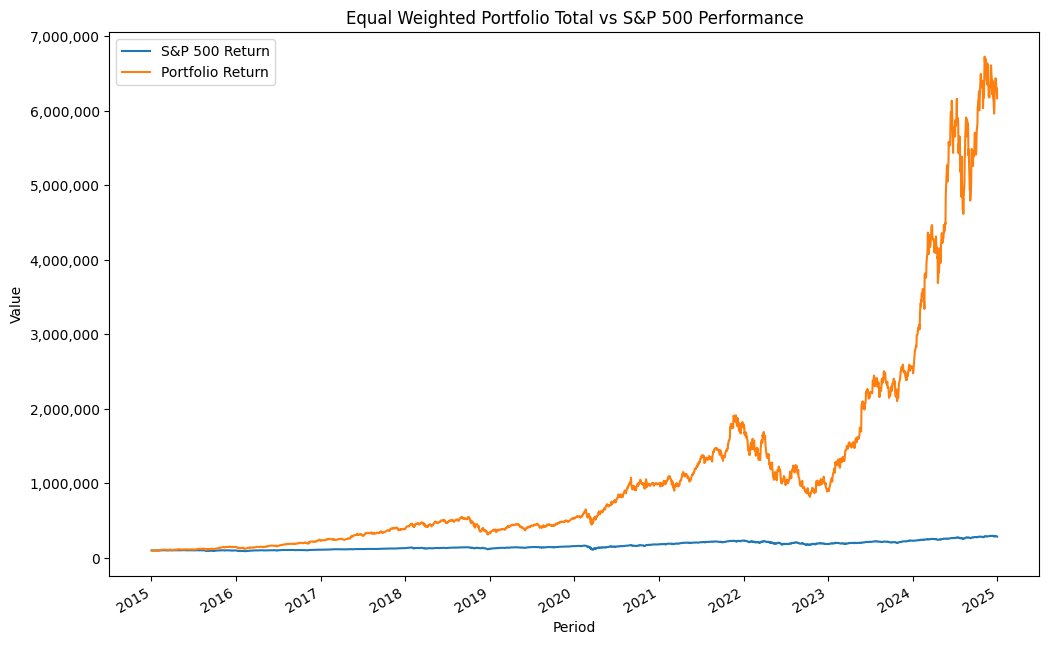

In [131]:

plt.figure(figsize=(12, 8))

# Plot with automatic legend labels from column names
Return[['S&P 500 Return', 'Portfolio Return']].plot(ax=plt.gca())

plt.title('Equal Weighted Portfolio Total vs S&P 500 Performance')
plt.xlabel('Period')
plt.ylabel('Value')

# Format y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Show legend
plt.legend()
plt.savefig('C:\\Users\\WY343EH\\OneDrive - EY\\Desktop\\Investment Analysis Project\\Outputs\\figure 8')
plt.show()


## Calculate Performance Metrics for the Portfolio
Now that we have created and visualized the equal-weighted portfolio, we can calculate a few metrics to further measure the performance of the portfolio. We will create five performances metrics:
 * Cumulative Return
 * Mean Daily Return
 * Standard Deviation Daily Return
 * Sharpe Ratio
 * Annualized Sharpe Ratio

In [118]:
# Define the end and start value of the portfolio
end_value = portfolio_values['Total'][-1]
start_value = portfolio_values['Total'][0]

# Calculate the cumulative portfolio return as a percentage
Cumulative_Return = (end_value /start_value) -1
print('The Cumulative_Return', Cumulative_Return,'times')

The Cumulative_Return 60.68776499786092 times


C:\Users\WY343EH\AppData\Local\Temp\ipykernel_11664\3433460091.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_value = portfolio_values['Total'][-1]
C:\Users\WY343EH\AppData\Local\Temp\ipykernel_11664\3433460091.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_value = portfolio_values['Total'][0]


In [119]:
# Create a 'Daily Returns' column
portfolio_values['Daily Returns'] = portfolio_values['Total'].pct_change()

portfolio_values.head()

,AMZN,AAPL,MSFT,NVDA,META,Total,Daily Returns
Date,,,,,,,
2015-01-02,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,100000.000000,NaN
2015-01-05,19585.223590,19436.516648,19816.082121,19600.0,19678.776291,98116.598651,-0.018834
2015-01-06,19131.561892,19443.834614,19525.235244,19200.0,19413.639261,96714.271011,-0.014292
2015-01-07,19338.950097,19714.599341,19773.310522,19200.0,19413.639261,97440.499221,0.007509
2015-01-08,19468.567725,20468.349799,20355.004277,20000.0,19928.616953,100220.538755,0.028531


In [120]:
# Calculate the mean Daily Return 
mean_daily_return = portfolio_values['Daily Returns'].mean()
mean_daily_returnpct = mean_daily_return * 100
print('The mean daily return is:',  str(mean_daily_return), 'or', str(mean_daily_returnpct),'%')

The mean daily return is: 0.0019009591102427021 or 0.1900959110242702 %


In [121]:
# Calculate the standard deviation of Daily Return 
std_daily_return = portfolio_values['Daily Returns'].std()
std_daily_returnpct = std_daily_return * 100

print('The std daily return is:',  str(std_daily_return), 'or', str(std_daily_returnpct),'%')


The std daily return is: 0.022865824212557707 or 2.286582421255771 %


In [122]:
# Calculate the sharpe ratio

# (average return of portfolio - risk free rate) / stardard deviation 

sharpe_ratio = (mean_daily_return - (0.0437/365)) /std_daily_return

sharpe_ratio

np.float64(0.07789936047296316)

In [123]:
# Calculate the annualized sharpe ratio

#sharpe_ratio * number of trading days

sharpe_ratio_annualized = sharpe_ratio* 252**0.5

sharpe_ratio_annualized

np.float64(1.2366140106146126)

## Calculate Performance Metrics for the S&P 500
Now that we have created and visualized the equal-weighted portfolio, we can calculate a few metrics to further measure the performance of the portfolio. We will create five performances metrics:
 * Cumulative Return
 * Mean Daily Return
 * Standard Deviation Daily Return
 * Sharpe Ratio
 * Annualized Sharpe Ratio

In [124]:
# Define the end and start value of the portfolio
end_value = SP500['Position Value'][-1]
start_value = SP500['Position Value'][0]

# Calculate the cumulative portfolio return as a percentage
Cumulative_Return = (end_value /start_value) -1
print('The Cumulative_Return', Cumulative_Return,'times')

The Cumulative_Return 1.8576571761733556 times


C:\Users\WY343EH\AppData\Local\Temp\ipykernel_11664\4223150276.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_value = SP500['Position Value'][-1]
C:\Users\WY343EH\AppData\Local\Temp\ipykernel_11664\4223150276.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_value = SP500['Position Value'][0]


In [125]:
# Create a 'Daily Returns' column
SP500['Daily Returns'] =  SP500['Position Value'].pct_change()

SP500.head()

,Adj Close,Normalised Returns,Position Value,Daily Returns
Date,,,,
2015-01-02,2058.2,1.000000,100000.000000,NaN
2015-01-05,2020.6,0.981732,98173.161014,-0.018268
2015-01-06,2002.6,0.972986,97298.610436,-0.008908
2015-01-07,2025.9,0.984307,98430.667574,0.011635
2015-01-08,2062.1,1.001895,100189.485959,0.017869


In [126]:
# Calculate the mean Daily Return 
mean_daily_return = SP500['Daily Returns'].mean()
mean_daily_returnpct = mean_daily_return * 100
print('The mean daily return is:',  str(mean_daily_return), 'or', str(mean_daily_returnpct),'%')

The mean daily return is: 0.0004809043961158806 or 0.04809043961158806 %


In [127]:
# Calculate the standard deviation of Daily Return 
std_daily_return = SP500['Daily Returns'].std()
std_daily_returnpct = std_daily_return * 100

print('The std daily return is:',  str(std_daily_return), 'or', str(std_daily_returnpct),'%')


The std daily return is: 0.011230146987585357 or 1.1230146987585357 %


In [128]:
# Calculate the sharpe ratio

# (average return of portfolio - risk free rate) / stardard deviation 

sharpe_ratio = (mean_daily_return - (0.0437/365)) /std_daily_return

sharpe_ratio

np.float64(0.0321614996774213)

In [129]:
# Calculate the annualized sharpe ratio

#sharpe_ratio * number of trading days

sharpe_ratio_annualized = sharpe_ratio* 252**0.5

sharpe_ratio_annualized

np.float64(0.510547979624045)

<Figure size 1200x800 with 0 Axes>

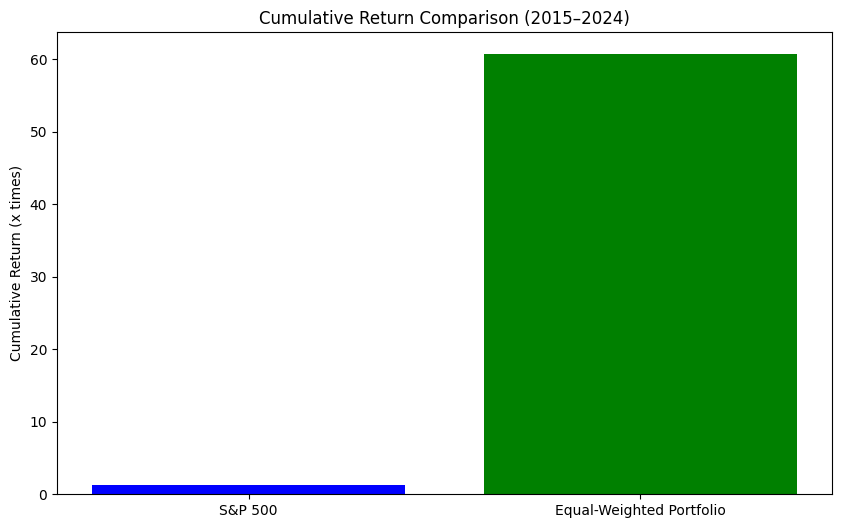

In [132]:

plt.figure(figsize=(12, 8))

# Cumulative return values
sp500_return = 1.24
portfolio_return = 60.69

# Labels and values
labels = ['S&P 500', 'Equal-Weighted Portfolio']
values = [sp500_return, portfolio_return]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'green'])

# Add title and labels
plt.title('Cumulative Return Comparison (2015–2024)')
plt.ylabel('Cumulative Return (x times)')
plt.savefig('C:\\Users\\WY343EH\\OneDrive - EY\\Desktop\\Investment Analysis Project\\Outputs\\figure 9')

# Show the chart
plt.show()


<Figure size 1200x800 with 0 Axes>

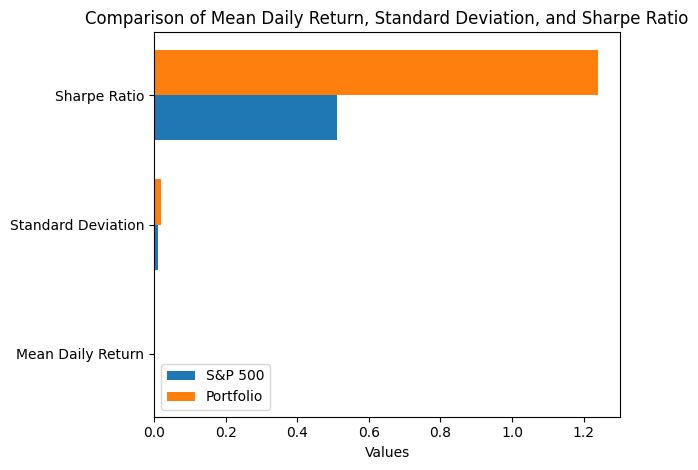

In [133]:

plt.figure(figsize=(12, 8))

# Data for the charts
categories = ['Mean Daily Return', 'Standard Deviation', 'Sharpe Ratio']
sp500_values = [0.0005, 0.01, 0.51]
portfolio_values = [0.002, 0.02, 1.24]

# Create horizontal bar charts
fig, ax = plt.subplots()

bar_width = 0.35
index = range(len(categories))

bar1 = plt.barh(index, sp500_values, bar_width, label='S&P 500')
bar2 = plt.barh([i + bar_width for i in index], portfolio_values, bar_width, label='Portfolio')

plt.xlabel('Values')
plt.title('Comparison of Mean Daily Return, Standard Deviation, and Sharpe Ratio')
plt.yticks([i + bar_width / 2 for i in index], categories)
plt.legend()

plt.tight_layout()
plt.savefig('C:\\Users\\WY343EH\\OneDrive - EY\\Desktop\\Investment Analysis Project\\Outputs\\figure 10')

plt.show()


In [130]:
#Extracts 
SP500.to_csv('C:\\Users\\WY343EH\\OneDrive - EY\\Desktop\\Investment Analysis Project\\Outputs\\S&P 500.csv')
portfolio_values.to_csv('C:\\Users\\WY343EH\\OneDrive - EY\\Desktop\\Investment Analysis Project\\Outputs\\Equal weighted portfolio_values.csv')
StockList.corr().to_csv('C:\\Users\\WY343EH\\OneDrive - EY\\Desktop\\Investment Analysis Project\\Outputs\\Statistics.csv')
StockList.to_csv('C:\\Users\\WY343EH\\OneDrive - EY\\Desktop\\Investment Analysis Project\\Outputs\\Stocklist.csv')